In [18]:
from scipy import fftpack
import numpy as np
import pylab as py
def azimuthalAverage(image, center=None):
    # Calculate the indices from the image
    y, x = np.indices((image.shape[0],image.shape[1]))
    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
    r = np.hypot(x - center[0], y - center[1])
    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]
    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)
    # Find all pixels that fall within each radial bin.
    # Assumes all radii represented
    deltar = r_int[1:] - r_int[:-1]
    # location of changed radius
    rind = np.where(deltar)[0]
    # number of radius bin
    nr = rind[1:] - rind[:-1]
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]
    radial_prof = tbin / nr
    return radial_prof

/home/fatadama/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


6534589.33952
50267.5237695


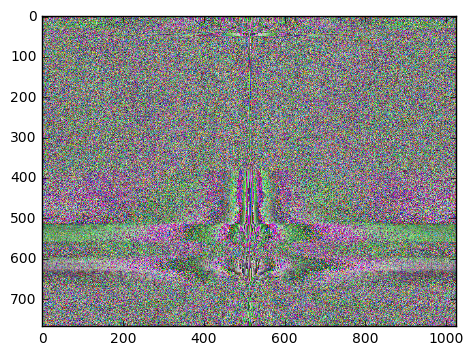

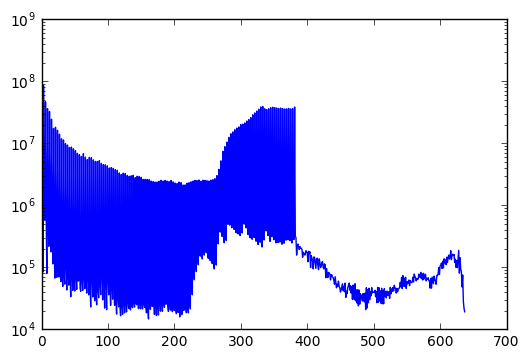

In [21]:
from loadImg import *
import matplotlib.pyplot as plt
im = loadScene(2)
#im = loadSynthetic(2)
# fourier transform
F1 = fftpack.fft2(im)
F2 = fftpack.fftshift( F1 )
psd2D = np.abs( F2 )**2
psd1D = azimuthalAverage(psd2D)

plt.figure()
plt.imshow(np.log10(psd2D))

# get 1D plot points and try to find the trend
plt.figure()
line2d = plt.semilogy( psd1D )
#x[0]-x[len(x)-1]
yvalues = line2d[0].get_ydata()
print(yvalues[0]-yvalues[-1])
print( np.sum([i-j for i, j in zip(yvalues[:-1],yvalues[1:])][100:len(yvalues)]) )
plt.show()